In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
faostat_df = pd.read_csv('FAOSTAT_data_en_11-19-2025.csv')
crop_df = pd.read_csv('Crop_recommendation.csv')

In [29]:
faostat_df 

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,4.840000e+02,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,1.666920e+05,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,4.303000e+02,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
5936,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
5937,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
5938,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [30]:
crop_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [31]:
print("Original FAOSTAT shape:", faostat_df.shape)

Original FAOSTAT shape: (5940, 15)


In [32]:
print("Original Crop shape:", crop_df.shape)

Original Crop shape: (2200, 8)


In [35]:
#Exploding
faostat_df_exploded = faostat_df.copy()
faostat_df_exploded['crop'] = faostat_df_exploded['Item'].str.split(',')


In [36]:
faostat_df_exploded = faostat_df_exploded.explode('crop')

In [37]:
faostat_df_exploded['crop'] = faostat_df_exploded['crop'].str.strip()

In [10]:
faostat_df_exploded

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN,Anise
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN,badian
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN,coriander
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN,cumin
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN,caraway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN,Wheat
5936,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN,Wheat
5937,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN,Wheat
5938,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN,Wheat


In [38]:
print(faostat_df_exploded['crop'].value_counts().head(20))

crop
raw                                                       399
n.e.c.                                                    360
dry                                                       360
green                                                     216
in shell                                                  209
raw or retted                                             192
Chillies and peppers                                      144
Peas                                                      144
Anise                                                      72
Other stone fruits                                         72
spice and aromatic crops                                   72
Other stimulant                                            72
Other pulses n.e.c.                                        72
Other oil seeds                                            72
Other fruits                                               72
Other berries and fruits of the genus vaccinium n.e.c.     72
Oth

In [39]:
crop_df = crop_df.rename(columns={'label': 'crop'})

print("Crop dataset crops:")
print(crop_df['crop'].value_counts())

Crop dataset crops:
crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [40]:
faostat_df_exploded['crop'] = faostat_df_exploded['crop'].str.lower().str.strip()
crop_df['crop'] = crop_df['crop'].str.lower().str.strip()

print("\nUnique crops in FAOSTAT (sample):")
print(sorted(faostat_df_exploded['crop'].unique())[:30])

print("\nUnique crops in crop_recommendation:")
print(crop_df['crop'].unique())


Unique crops in FAOSTAT (sample):
['and other textile bast fibres', 'anise', 'apples', 'apricots', 'areca nuts', 'badian', 'bananas', 'barley', 'beans', 'cabbages', 'cantaloupes and other melons', 'caraway', 'cardamoms', 'carrots and turnips', 'cashew nuts', 'cassava', 'castor oil seeds', 'cauliflowers and broccoli', 'cherries', 'chick peas', 'chillies and peppers', 'clementines', 'cocoa beans', 'coconuts', 'coffee', 'coir', 'coriander', 'cucumbers and gherkins', 'cumin', 'dry']

Unique crops in crop_recommendation:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [41]:
# crops present in both datasets 
common_crops = set(faostat_df_exploded['crop'].unique()) & set(crop_df['crop'].unique())
print("\nCommon crops between datasets:")
print(common_crops)

faostat_filtered = faostat_df_exploded[faostat_df_exploded['crop'].isin(common_crops)].copy()
crop_filtered = crop_df[crop_df['crop'].isin(common_crops)].copy()

print("\nFAOSTAT filtered shape:", faostat_filtered.shape)
print("Crop filtered shape:", crop_filtered.shape)


Common crops between datasets:
{'jute', 'grapes', 'coffee', 'rice'}

FAOSTAT filtered shape: (288, 16)
Crop filtered shape: (400, 8)


In [15]:
# Merge on crop column
merged_df = pd.merge(
    faostat_filtered,
    crop_filtered,
    on='crop',
    how='inner',          
    suffixes=('_faostat', '_crop')
)

print("\nMerged dataset shape:", merged_df.shape)
print("Merged columns:", merged_df.columns.tolist())
print("\nMerged head:")
print(merged_df.head())



Merged dataset shape: (28800, 23)
Merged columns: ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'crop', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

Merged head:
  Domain Code                        Domain  Area Code (M49)   Area  \
0         QCL  Crops and livestock products              356  India   
1         QCL  Crops and livestock products              356  India   
2         QCL  Crops and livestock products              356  India   
3         QCL  Crops and livestock products              356  India   
4         QCL  Crops and livestock products              356  India   

   Element Code         Element  Item Code (CPC)           Item  Year Code  \
0          5312  Area harvested           1610.0  Coffee, green       2000   
1          5312  Area harvested           1610.0  Coffee, green       2000   
2          5312  Area har

In [42]:
merged_df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Flag Description,Note,crop,N,P,K,temperature,humidity,ph,rainfall
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2000,2000,...,Official figure,NaN,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941
1,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2000,2000,...,Official figure,NaN,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134
2,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2000,2000,...,Official figure,NaN,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2000,2000,...,Official figure,NaN,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782
4,QCL,Crops and livestock products,356,India,5312,Area harvested,1610.0,"Coffee, green",2000,2000,...,Official figure,NaN,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,Official figure,NaN,rice,88,46,42,22.683191,83.463583,6.604993,194.265172
28796,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,Official figure,NaN,rice,93,47,37,21.533463,82.140041,6.500343,295.924880
28797,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,Official figure,NaN,rice,60,55,45,21.408658,83.329319,5.935745,287.576694
28798,QCL,Crops and livestock products,356,India,5510,Production,113.0,Rice,2023,2023,...,Official figure,NaN,rice,78,35,44,26.543481,84.673536,7.072656,183.622266


In [43]:
#  Check nulls
print("\n=== NULL VALUES CHECK ===")
null_counts = merged_df.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False))



=== NULL VALUES CHECK ===
Note    28800
dtype: int64


In [44]:
#  Check duplicates
print("\n=== DUPLICATES CHECK ===")
print("Total duplicate rows:", merged_df.duplicated().sum())

# If Year and Element exist, check duplicates by these keys
key_cols = [col for col in ['crop', 'Year', 'Element'] if col in merged_df.columns]
if key_cols:
    print("Duplicates by", key_cols, ":", merged_df.duplicated(subset=key_cols).sum())
else:
    print("Key columns not fully available for duplicate check.")



=== DUPLICATES CHECK ===
Total duplicate rows: 0
Duplicates by ['crop', 'Year', 'Element'] : 28512


In [45]:
#  Drop duplicates
if key_cols:
    merged_df_clean = merged_df.drop_duplicates(subset=key_cols, keep='first')
else:
    merged_df_clean = merged_df.drop_duplicates(keep='first')

print("\nShape after dropping duplicates:", merged_df_clean.shape)
print("Remaining duplicate rows:", merged_df_clean.duplicated().sum())



Shape after dropping duplicates: (288, 23)
Remaining duplicate rows: 0


In [46]:
#  Drop  nulls 
critical_cols = [c for c in ['crop', 'Year', 'Value', 'N', 'P', 'K'] if c in merged_df_clean.columns]
merged_df_clean = merged_df_clean.dropna(subset=critical_cols)

print("\nShape after dropping nulls in critical columns:", merged_df_clean.shape)



Shape after dropping nulls in critical columns: (288, 23)


In [47]:
# Select numeric columns 
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Value']

num_cols = [c for c in num_cols if c in merged_df_clean.columns]

print("=== Numerical summary statistics ===")
print(merged_df_clean[num_cols].describe())


=== Numerical summary statistics ===
                N           P           K  temperature    humidity  \
count  288.000000  288.000000  288.000000   288.000000  288.000000   
mean    73.500000   60.000000   75.500000    25.683746   73.289380   
std     28.637346   41.647601   69.389975     3.250972   10.001117   
min     24.000000   21.000000   26.000000    20.879744   57.364700   
25%     72.750000   36.750000   35.000000    24.363453   68.527556   
50%     89.500000   44.500000   40.500000    25.929235   76.895037   
75%     90.250000   67.750000   81.000000    27.249528   81.656861   
max     91.000000  130.000000  195.000000    29.996772   82.002744   

               ph    rainfall         Value  
count  288.000000  288.000000  2.880000e+02  
mean     6.469782  153.400705  1.715771e+07  
std      0.494251   53.391027  4.428162e+07  
min      6.002525   67.125345  6.943000e+02  
25%      6.084860  130.696584  7.288550e+03  
50%      6.307645  171.770969  3.260620e+05  
75%      6

In [48]:
print("\n=== Crop counts ===")
print(merged_df_clean['crop'].value_counts())

if 'Element' in merged_df_clean.columns:
    print("\n=== Element counts ===")
    print(merged_df_clean['Element'].value_counts())



=== Crop counts ===
crop
coffee    72
grapes    72
jute      72
rice      72
Name: count, dtype: int64

=== Element counts ===
Element
Area harvested    96
Yield             96
Production        96
Name: count, dtype: int64


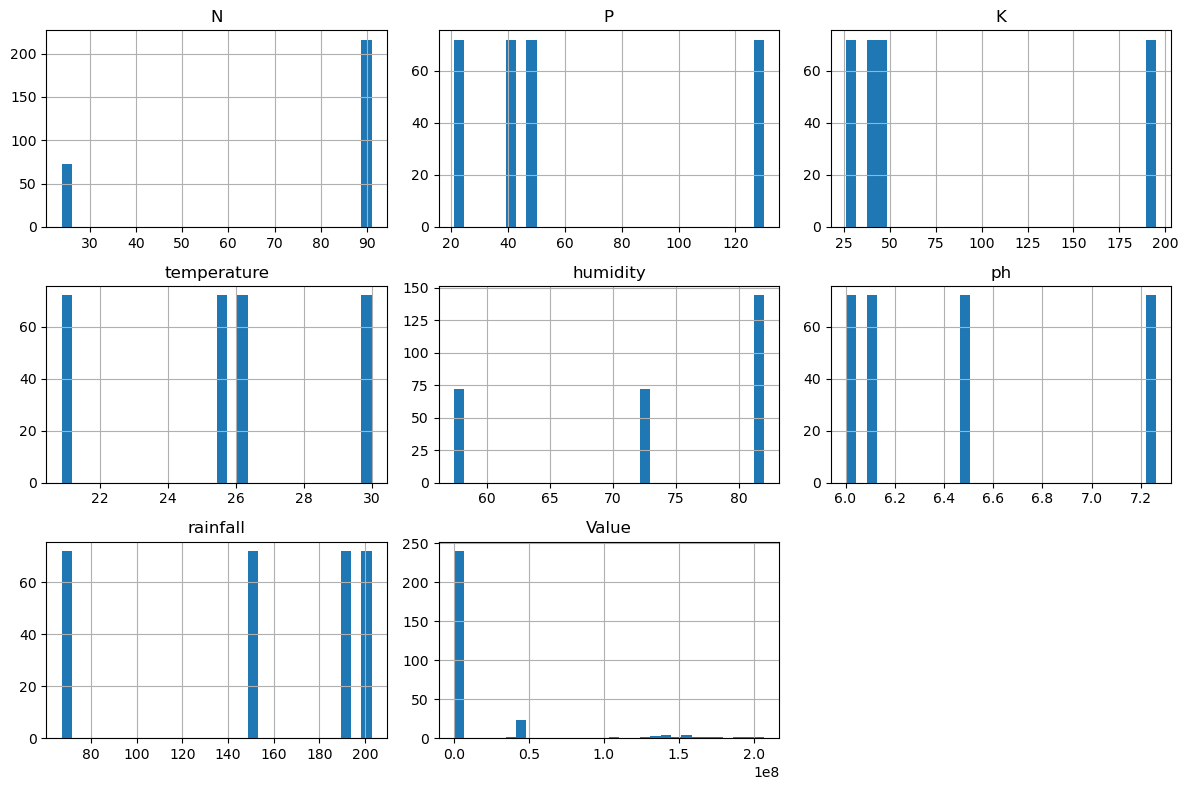

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
merged_df_clean[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

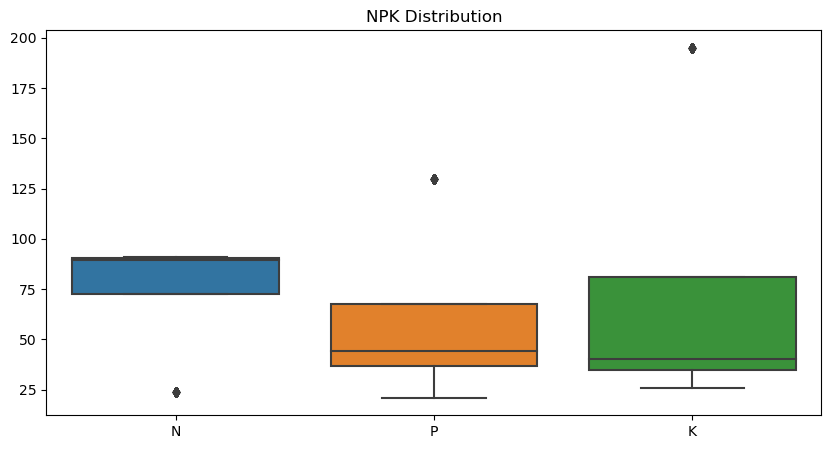

In [49]:
# Boxplots for NPK
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_df_clean[['N','P','K']])
plt.title('NPK Distribution')
plt.show()

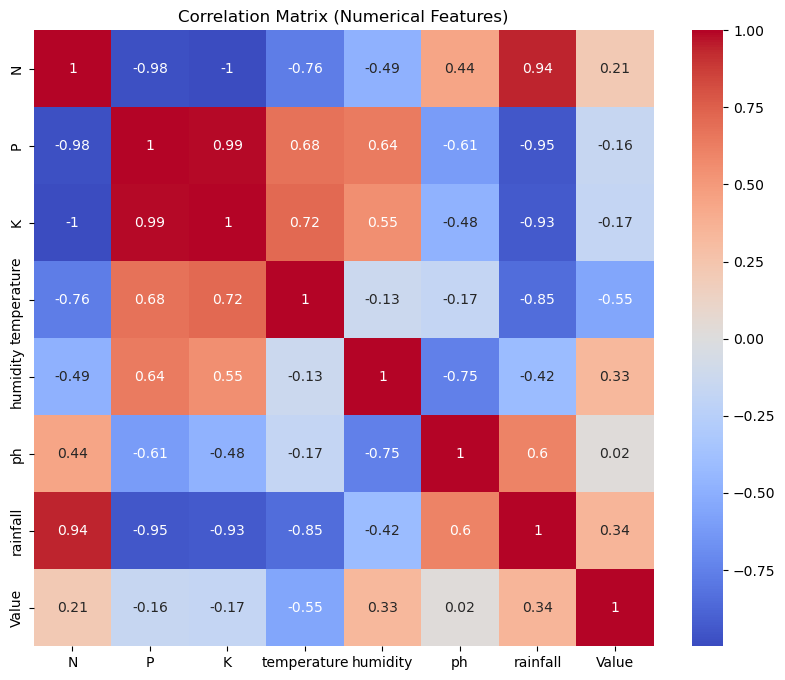

In [50]:
plt.figure(figsize=(10, 8))
corr = merged_df_clean[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


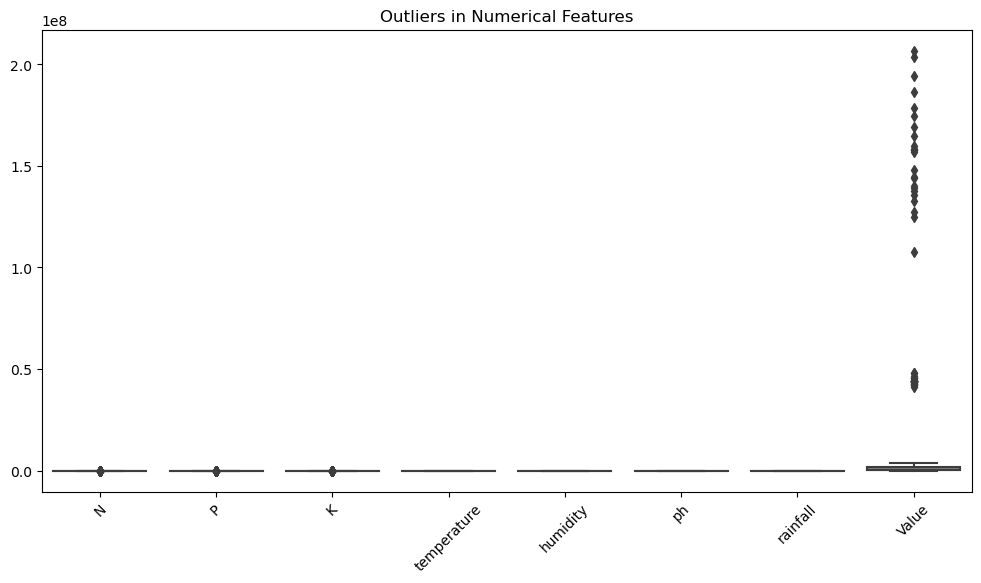

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df_clean[num_cols])
plt.title('Outliers in Numerical Features')
plt.xticks(rotation=45)
plt.show()
